# Part 1


In [1]:
import numpy as np
import pandas as pd

#read data
autos = pd.read_csv("project1.data", delimiter=',')

### Identify shape and size of the raw data

In [2]:
print("Shape of the data:", autos.shape)
print("Size of the data:", autos.size)

Shape of the data: (398, 9)
Size of the data: 3582


### Get information about the types of data. Does it need any datatype conversion? If needed perform the conversion.

In [3]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
# horspower is an object data type so it might have non-numeric values
autos['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [5]:
# convert question marks to nan values
autos['horsepower'] = pd.to_numeric(autos['horsepower'], errors='coerce')
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


### Drop non-important columns if needed

In [6]:
autos['origin'].unique()

array([1, 3, 2], dtype=int64)

In [7]:
# The origin column looks hot-coded for where each car company is from, but it doesn't seem necessary 
autos.drop(['origin'], axis=1, inplace=True)
# the car names are good to know but they do not offer any information relevant for statistical analysis
autos.drop(['car_name'], axis=1, inplace=True)

### Is the data missing in any of the columns?

In [8]:
# The are 398 entries but horsepower has 392 non-null values
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


### We replace the nan values with the average value for that column

In [9]:
autos['horsepower'].fillna(autos['horsepower'].mean(), inplace=True)
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


### Derive statistical information from the data: can you predict any outliers using this information?

In [10]:
autos.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  398.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.199187   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   76.000000  2223.750000   
50%     23.000000    4.000000    148.500000   95.000000  2803.500000   
75%     29.000000    8.000000    262.000000  125.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000

The .describe() method summarizes column statistics through information like the range of values (min/max), standard deviation, and percentiles (25th and 75th) for data distribution insights. Each of these characteristics can help figure out where to look for outliers first. For example, looking at the minimum and maximum values that fall far from the 25th or 75th percentiles may be considered outliers.

### Perform one-hot encoding of categorical data if needed

One-hot encoding is most applicable to categorical data, especially categorical data represented in non-numerical values. Most of the data is represented by number except car name, but there are too many unique values in the car_name column for one-hot coding to be necessary. 

### Visualize the dataset through different univariate and bivariate analysis plots.

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

#### univariate analysis plots

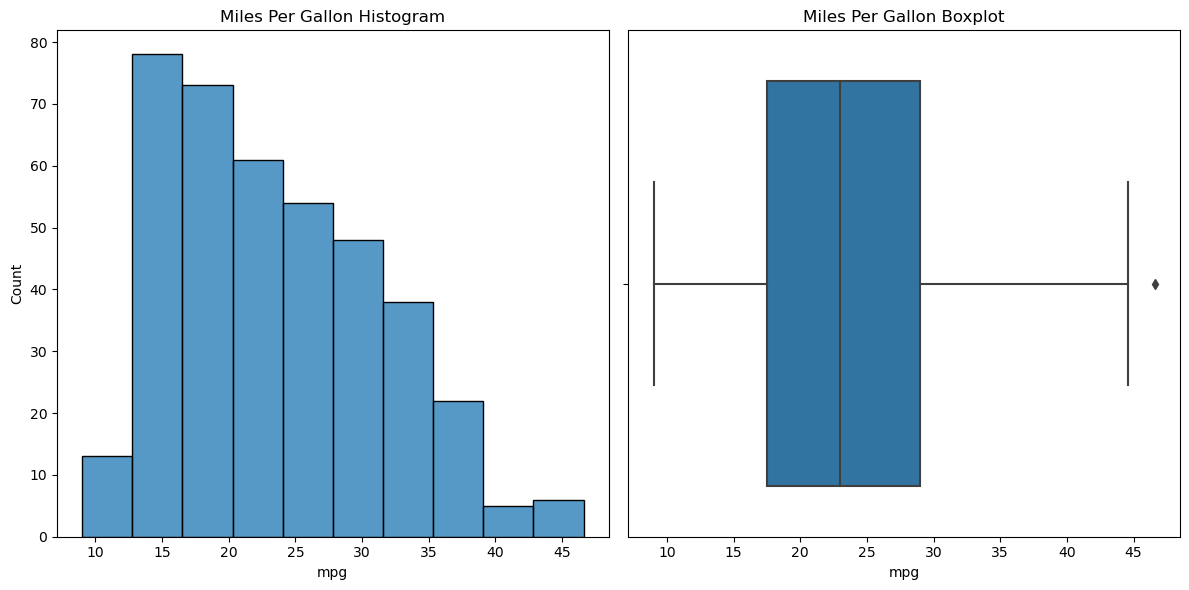

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram
sns.histplot(data=autos['mpg'], bins=10, ax=axes[0])
axes[0].set_title('Miles Per Gallon Histogram')
# Boxplot
sns.boxplot(data=autos, x='mpg', ax=axes[1])
axes[1].set_title('Miles Per Gallon Boxplot')

plt.tight_layout()
plt.show()

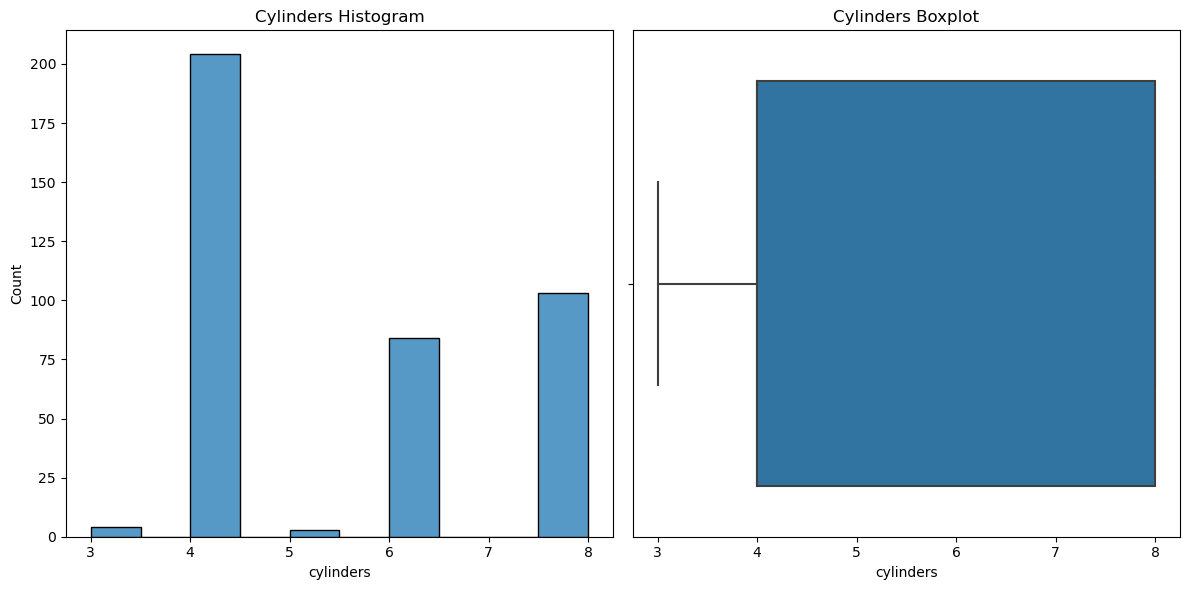

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram
sns.histplot(data=autos['cylinders'], bins=10, ax=axes[0])
axes[0].set_title('Cylinders Histogram')
# Boxplot
sns.boxplot(data=autos, x='cylinders', ax=axes[1])
axes[1].set_title('Cylinders Boxplot')

plt.tight_layout()
plt.show()

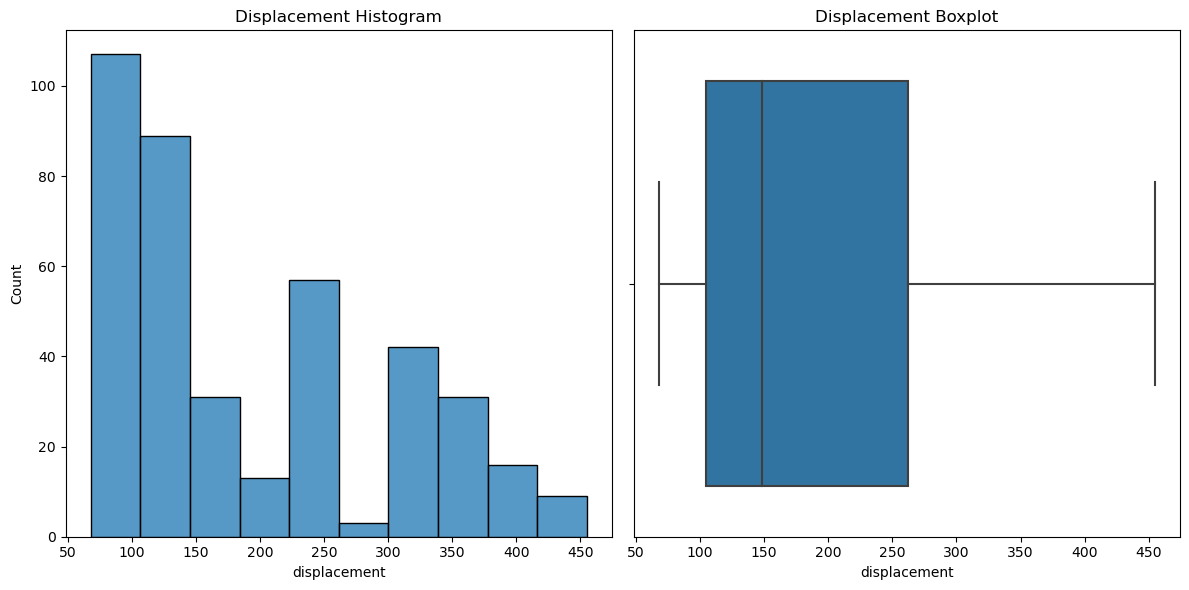

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram
sns.histplot(data=autos['displacement'], bins=10, ax=axes[0])
axes[0].set_title('Displacement Histogram')
# Boxplot
sns.boxplot(data=autos, x='displacement', ax=axes[1])
axes[1].set_title('Displacement Boxplot')

plt.tight_layout()
plt.show()

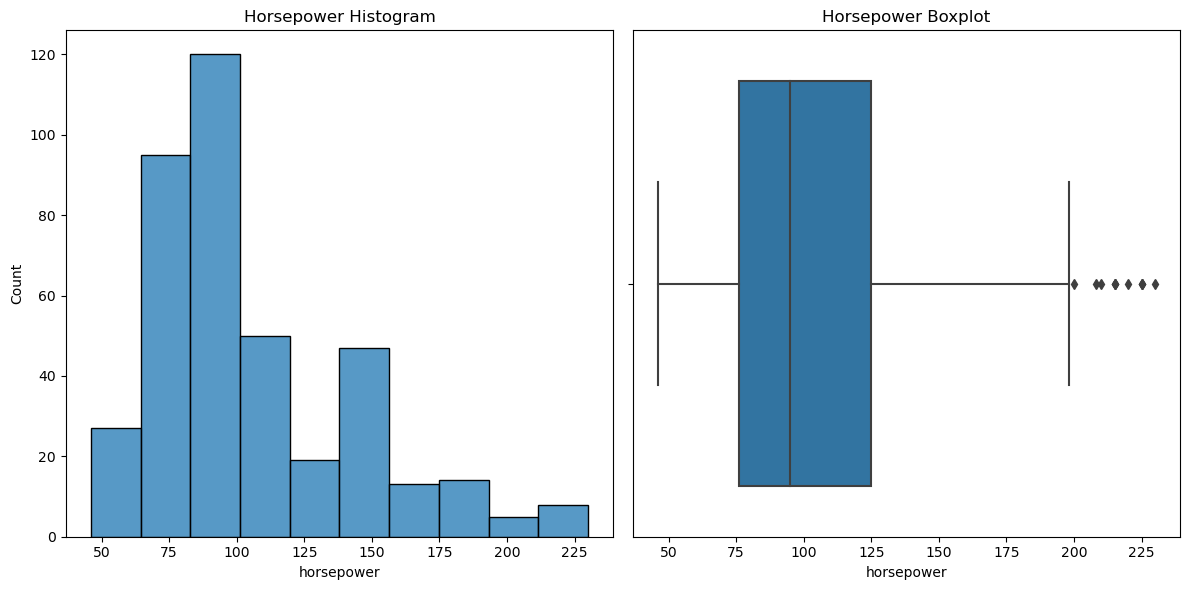

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram
sns.histplot(data=autos['horsepower'], bins=10, ax=axes[0])
axes[0].set_title('Horsepower Histogram')
# Boxplot
sns.boxplot(data=autos, x='horsepower', ax=axes[1])
axes[1].set_title('Horsepower Boxplot')

plt.tight_layout()
plt.show()

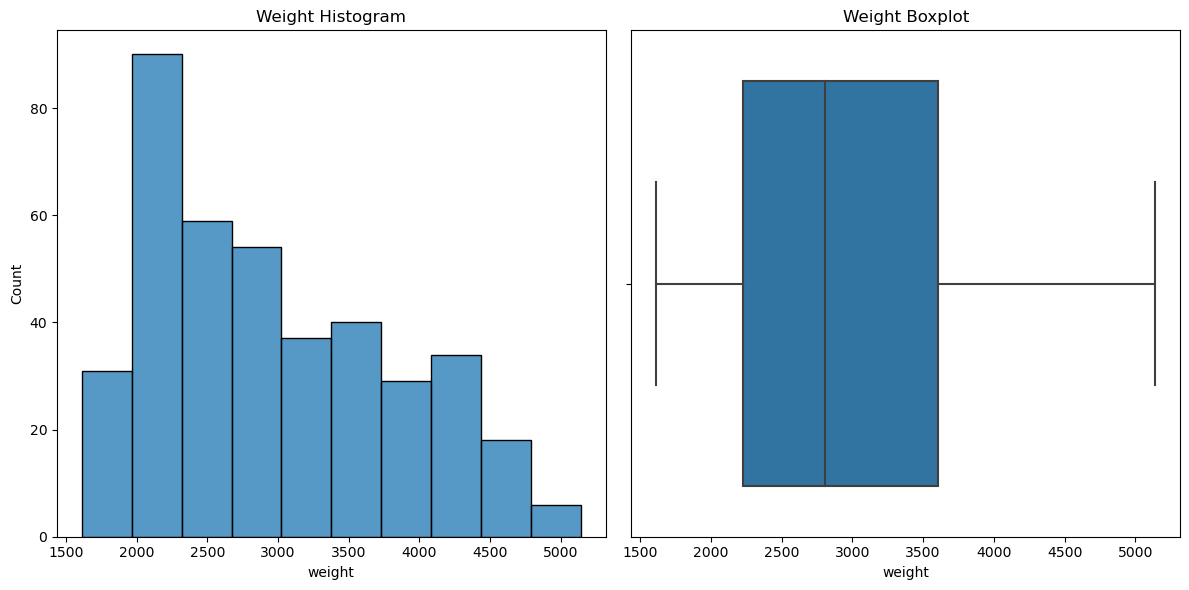

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram
sns.histplot(data=autos['weight'], bins=10, ax=axes[0])
axes[0].set_title('Weight Histogram')
# Boxplot
sns.boxplot(data=autos, x='weight', ax=axes[1])
axes[1].set_title('Weight Boxplot')

plt.tight_layout()
plt.show()

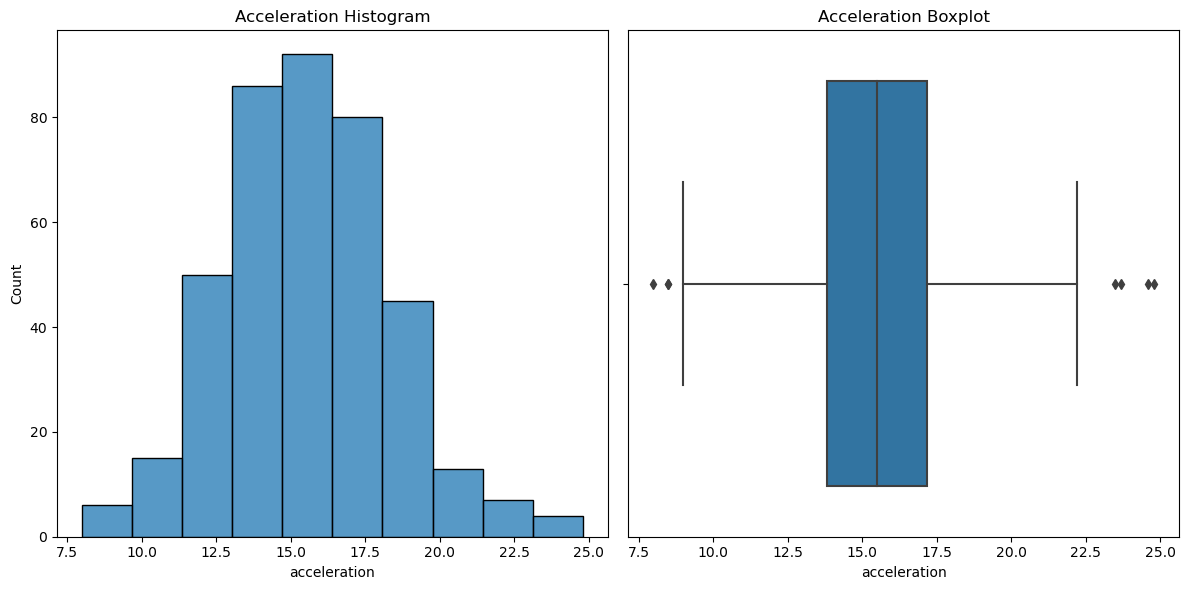

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram
sns.histplot(data=autos['acceleration'], bins=10, ax=axes[0])
axes[0].set_title('Acceleration Histogram')
# Boxplot
sns.boxplot(data=autos, x='acceleration', ax=axes[1])
axes[1].set_title('Acceleration Boxplot')

plt.tight_layout()
plt.show()

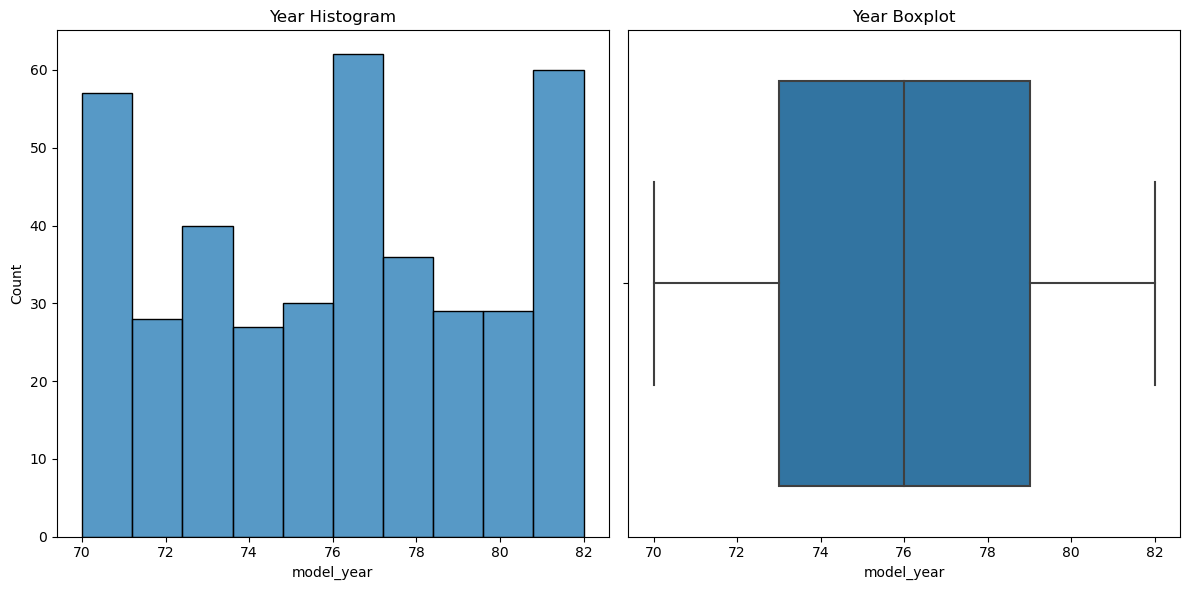

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram
sns.histplot(data=autos['model_year'], bins=10, ax=axes[0])
axes[0].set_title('Year Histogram')
# Boxplot
sns.boxplot(data=autos, x='model_year', ax=axes[1])
axes[1].set_title('Year Boxplot')

plt.tight_layout()
plt.show()

### Find correlations between different columns

#### multivariate analysis plots

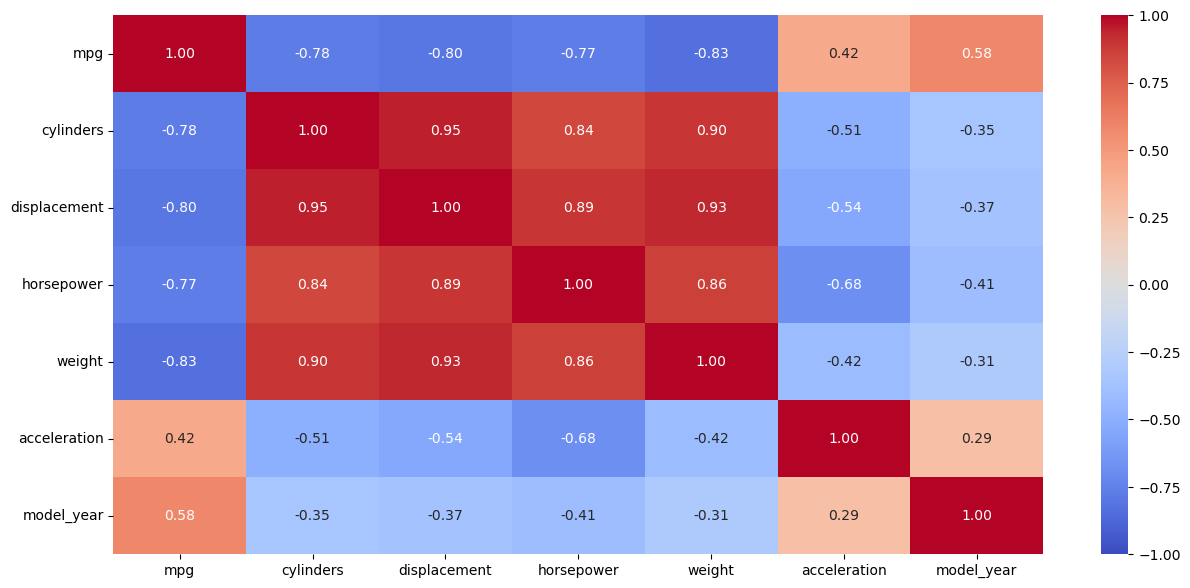

In [19]:
# heatmap
# columns to corrolate
corr_cols=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year']

# increate the figure size
plt.figure(figsize=(15, 7))

# the actual heat map
sns.heatmap(autos[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm")

# show the plot
plt.show()

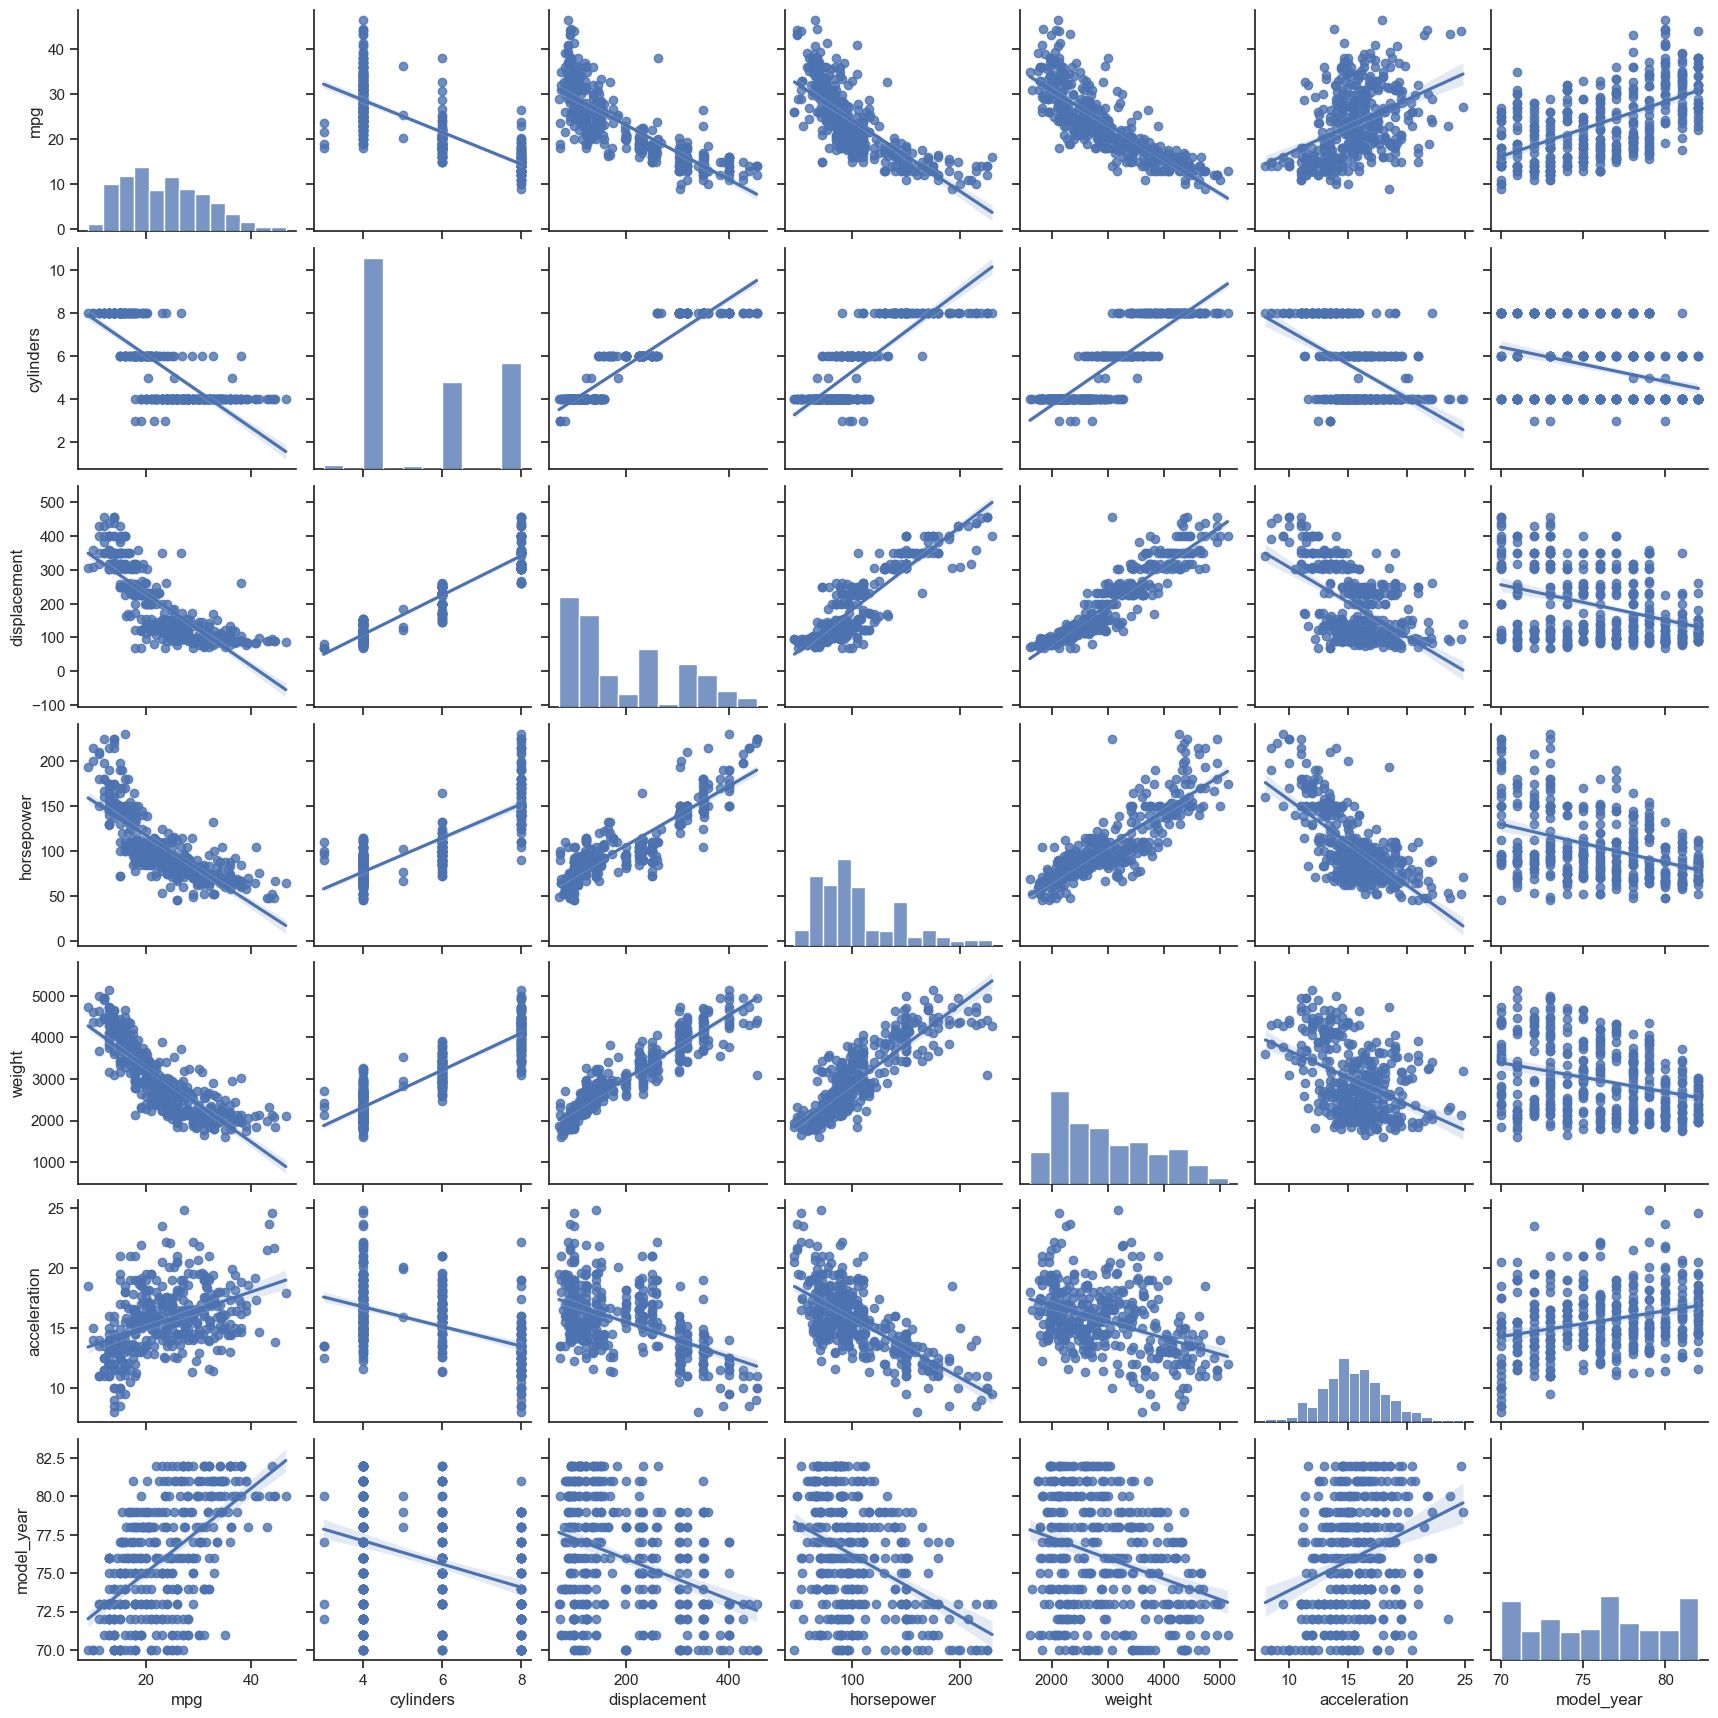

In [20]:
#pair plots for each pairing in the heatmap
sns.set(style="ticks")
pairplot_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
sns.pairplot(autos[pairplot_cols], kind="reg")
plt.show()

### Provide your insights on what variables affect the fuel efficiency of automobiles

Fuel efficiency is most accurately captured by miles per gallon (mpg). The heatmap reveals that the factors most closely correlated with mpg include cylinders, displacement, horsepower, and weight. Upon visual inspection of the scatter plots, it appears that most trendlines align closely with the data points. However, the scatter plot depicting the relationship between cylinders and mpg exhibits several data points that deviate noticeably from the trendline.

# Part 2

### Split the dataset into Training and Test sets

In [21]:
from sklearn.model_selection import train_test_split

# Create X and y variables pointing to your independent and dependent variables, respectively.
X = autos.drop('mpg', axis=1)
y = autos['mpg']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

### Fit Linear Regression model on it

In [22]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
X_train.shape

(199, 6)

In [24]:
X_test.shape

(199, 6)

In [25]:
y_pred = lr.predict(X_test.iloc[0:199])
y_pred

array([22.01422907, 26.16440519, 19.47913022, 25.69506111, 24.11781695,
       14.97018301, 28.8759791 , 33.59050794, 16.17764492, 10.64099794,
       31.32832832, 16.46461713, 22.30391381, 26.55267662, 35.53318965,
       22.72979646, 10.03422179, 20.94977277,  8.12685444, 32.53934703,
       25.93816323, 31.12169793, 21.51438289, 25.26551038, 27.15289928,
       28.76382246, 31.62410143, 31.91820042, 14.92989699, 30.93677554,
       28.04377764, 10.17168796, 20.85287901, 27.84142782, 26.17467834,
       13.55374101, 28.57057452,  8.47484204, 32.35465389, 25.28488635,
       26.36818813, 25.93475639, 20.11578158, 32.36836086, 26.98225736,
       22.26599727, 21.07066816, 11.34463731, 28.1416034 , 19.11860041,
       24.5077392 , 27.93469994, 15.83680895, 11.57496434, 30.38895482,
       25.26647439,  9.64927174, 12.47176664, 30.19634361, 34.67977093,
       34.79361327, 34.7796814 , 17.47798648, 28.24663028, 19.20781522,
       31.95474859, 27.5091301 , 26.62181292, 30.77948487, 12.32

### Calculate the accuracy for training and test data

In [26]:
lr.score(X_train, y_train)

0.7998424107647886

In [27]:
lr.score(X_test, y_test)

0.8153734105599774

### Which of the above measures is more relevant for this problem statement?

So the point of linear regression is to predict values of a dependant variable based on one or many independant variables, because data is not available for every real world scenario or possibility. In cases where we do have a large dataset, we can use part of the data to train the linear regression model using one part of the data to predict the values in the other part of the data. In this case, we use the train data to predict values in the test data, meaning that measuring the accuracy of the test data preditions is more relevant.

### Making Plots That Weren't Asked For

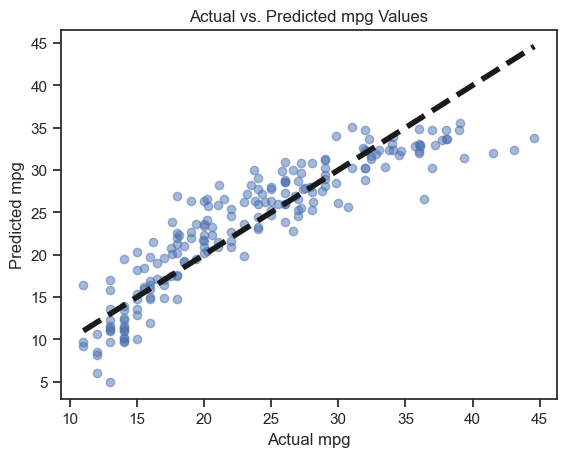

In [28]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual mpg')
plt.ylabel('Predicted mpg')
plt.title('Actual vs. Predicted mpg Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()